# 시각화

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from numpy.random import randn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'    #%matplotlib 뒤에 넣어주면 그래프를 더 높은 해상도로 출력

## 간단한 matplotlib API

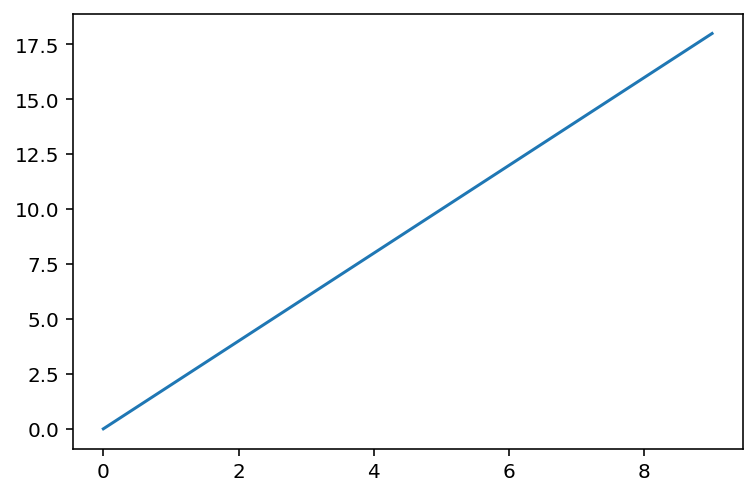

In [5]:
plt.plot(np.arange(0,20,2))  # x축은 by default 1,2,3,4...

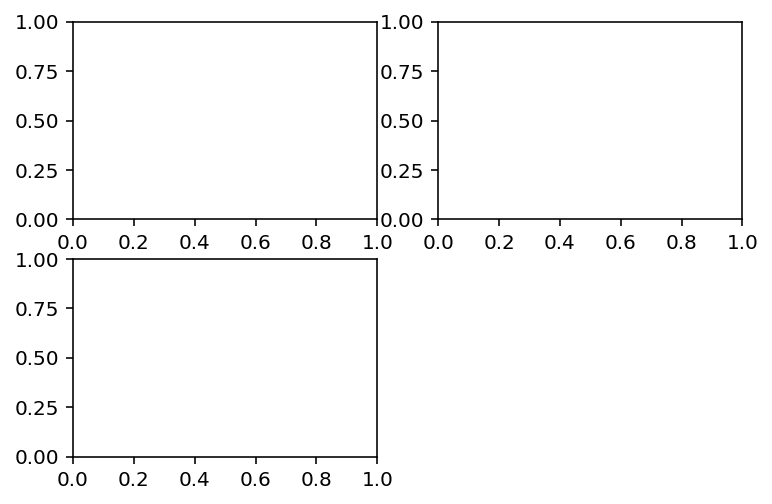

In [6]:
fig = plt.figure() 
ax1 = fig.add_subplot(2, 2, 1)    #그래프 추가 / 행 열 위치
ax2 = fig.add_subplot(2, 2, 2) 
ax3 = fig.add_subplot(2, 2, 3)

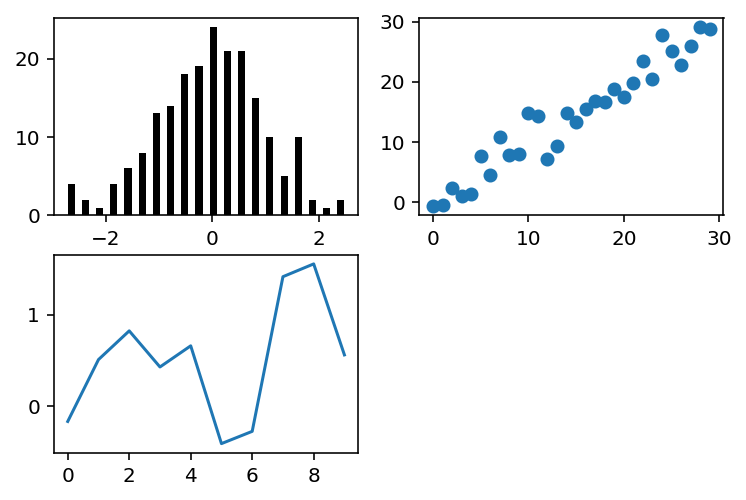

In [7]:
ax1.hist(np.random.randn(200), bins=20, color='k', rwidth=0.5)    #k는 검정색, 디폴트는 파란색
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))    #3을 곱하지 않으면 폭이 좁아짐
ax3.plot(np.arange(10),np.random.randn(10))
fig

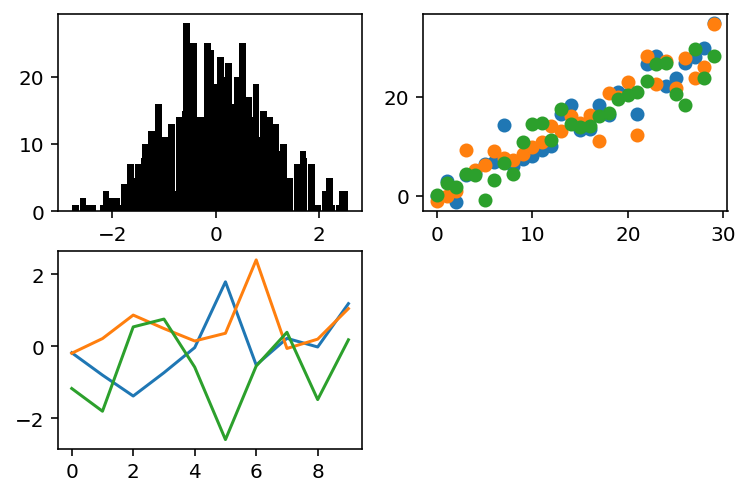

In [43]:
#기존의 그래프에 데이터를 누적시킴
ax1.hist(np.random.randn(200), bins=20, color='k', rwidth=0.5)   #x축 항목개수
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))
ax3.plot(np.arange(10),np.random.randn(10))

fig

(<Figure size 432x288 with 6 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

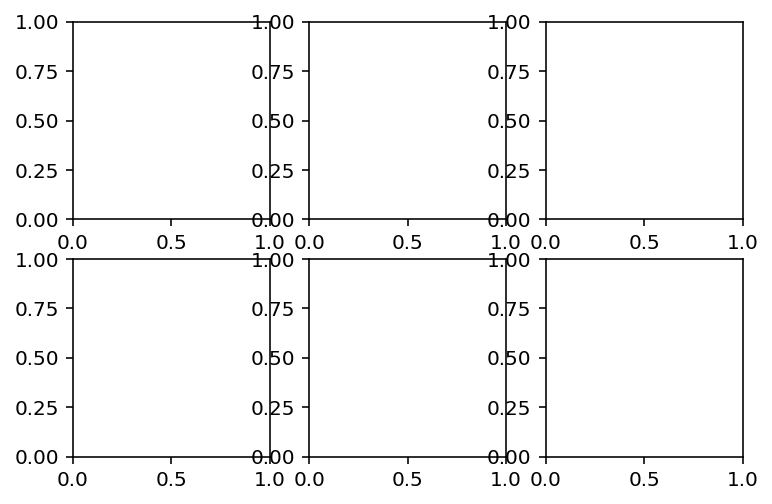

In [8]:
axes = plt.subplots(2, 3) ## 2*3을 설정해주고 아래의 결과를 볼 수 있다.
axes

#### subplot 주변의 공간 고정

In [13]:
# 그래프가 겹치는 것을 방지
# left, bottom, right, top : 서브플롯 4면의 위치 조정
# hspace, wspace : 서브플롯 간의 간격을 위해 각각 figure의 너비와 높이에 대한 비율 조절
axes = plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None) # subplot 간의 간격을 조정하는 함수 _adjust()
# wspace, hspace: width and height between the subplots
# left, right, top, bottom: sides of the subplot

<Figure size 432x288 with 0 Axes>

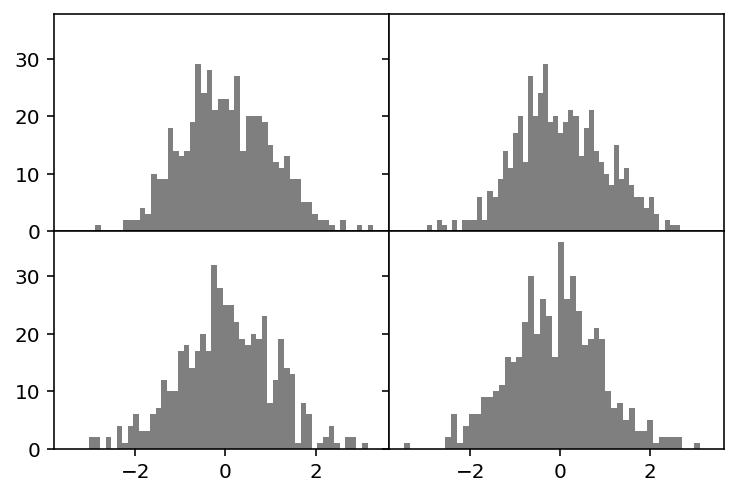

In [9]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)#x,y 같은 눈끔 사용
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)    #alpha : 투명도
plt.subplots_adjust(wspace=0, hspace=0)    #정수는 배수

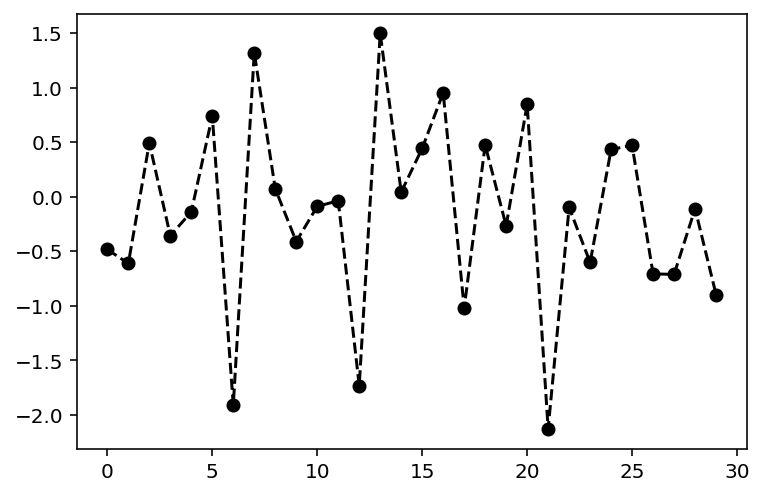

In [29]:
plt.plot(randn(30), 'ko--')    #color, marker, line style

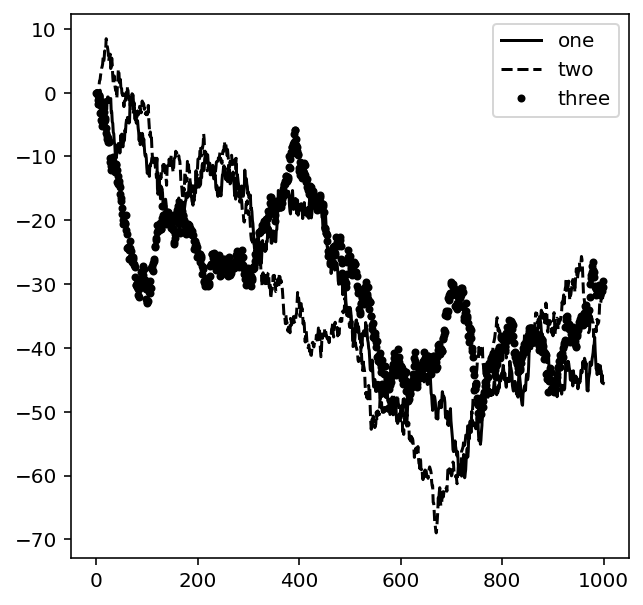

In [10]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)#1행1열에서1번째
ax.plot(randn(1000).cumsum(), 'k', label='one')    #cumsum() : 누적된 합
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')    #범례를 자동으로 최적의 위치에 만듦

### subplot 주석달기 및 그리는 방법

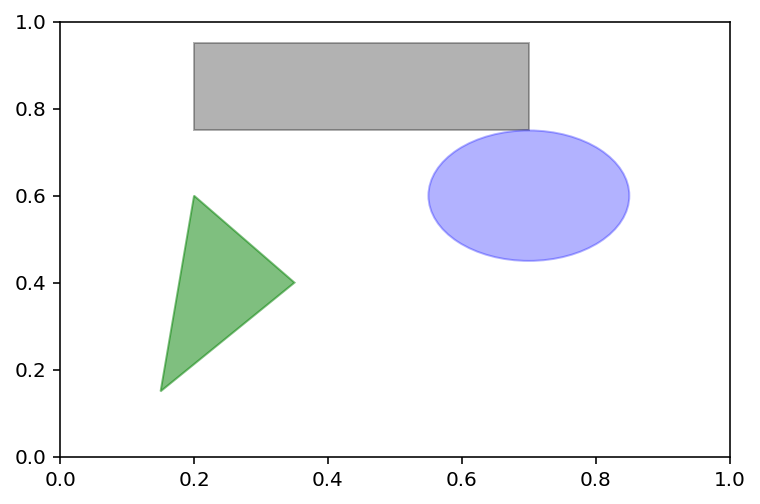

In [11]:
fig = plt.figure()    
#fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.5, 0.2, color='k', alpha=0.3) ##(0.2,0.75) 사각형의 시작점 0.5 가로길이 0.2 세로길이를 뜻한다.
                                                            ## alpha 색깔의 명도를 나타내준다 인수를 바꿔서 결과 변화를 확인해보자!
circ = plt.Circle((0.7, 0.6), 0.15, color='b', alpha=0.3) ## (0,7,0,2) 원의 중심 을 뜻한다 / 0.15 원의 반지름을 뜻한다.

pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], #꼭지점의 좌표
                   color='g', alpha=0.5)

ax.add_patch(rect) ## ax subplot에 도형을 추가한다.
ax.add_patch(circ)
ax.add_patch(pgon)

### Series 나 DataFrame 으로부터 막대그라프 그리는 예

<AxesSubplot:>

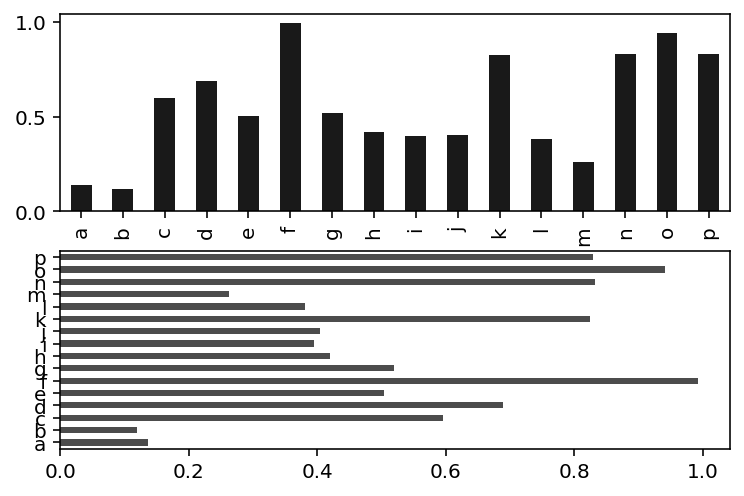

In [12]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.9)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

In [33]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [34]:
df

Genus,A,B,C,D
one,0.256952,0.020910,0.223090,0.056516
two,0.103395,0.431508,0.229918,0.515946
three,0.253494,0.940537,0.905944,0.566806
four,0.354424,0.381147,0.411852,0.727579
five,0.451639,0.856730,0.944095,0.335946
six,0.560694,0.095057,0.200469,0.413466


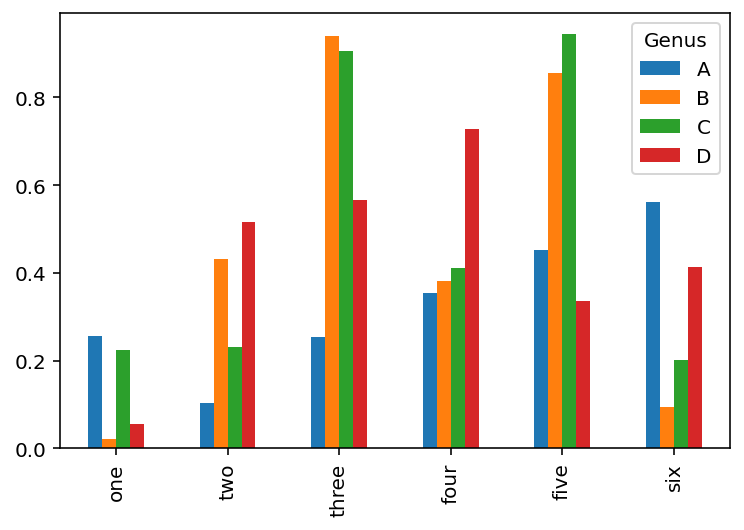

In [35]:
df.plot(kind='bar')

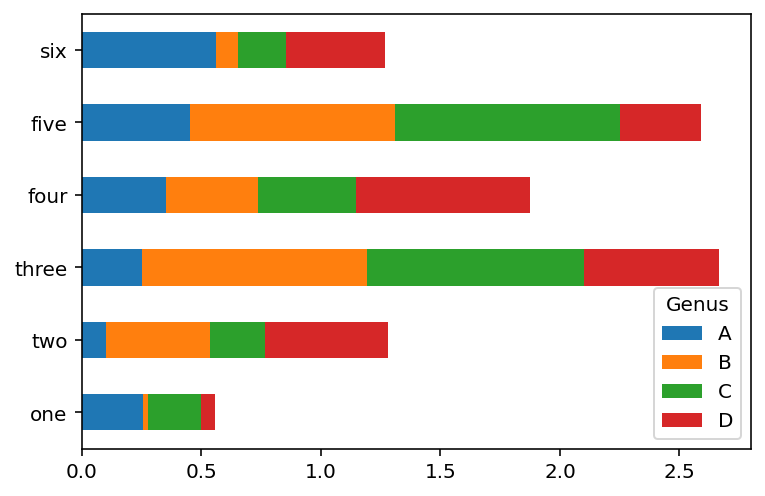

In [51]:
df.plot(kind='barh',stacked=True)

### 히스토그램 및 밀도 그래프

<AxesSubplot:ylabel='Density'>

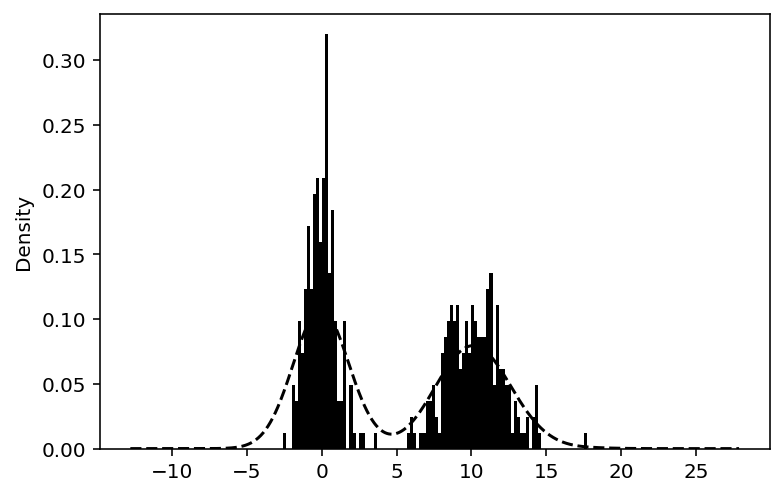

In [16]:
np.random.seed(42)
# 정규분포
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1) - (평균, 표준편차, 개수)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 2)
values = Series(np.concatenate([comp1, comp2])) #concat(1,2) -1번째 문자열에 두번째 문자열을 합치는 함수와 동일
values.hist(bins=100, alpha=1, color='k', density=True)    #확률밀도 설정(점선) - True일경우 히스토그램 값들의 면적(적분)값은 1이된다.
# alpha : 투명도
values.plot(kind='kde', style='k--')
# kde (kernel density estimation - 히스토그램으로부터 확률밀도함수 추정)

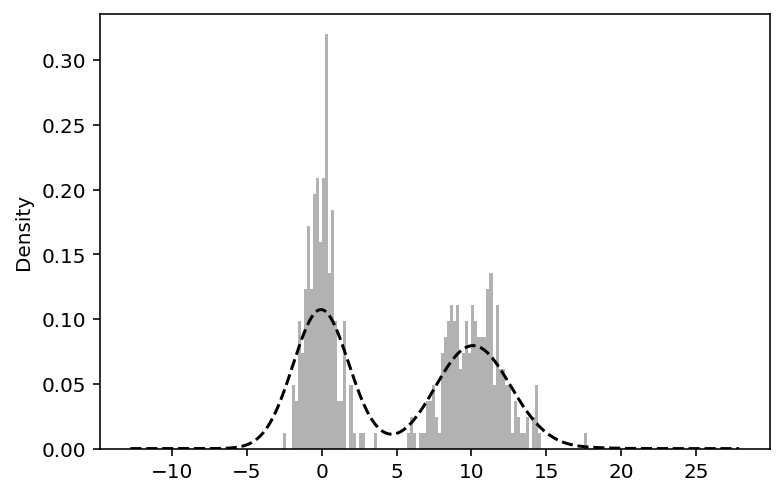

In [38]:
np.random.seed(42)
comp1 = np.random.randn(200)  # N(0, 1)
comp2 = 10 + 2* np.random.randn(200)  # N(10, 2)
values = Series(np.concatenate([comp1, comp2])) #concat(1,2) -1번째 문자열에 두번째 문자열을 합치는 함수와 동일
values.hist(bins=100, alpha=0.3, color='k', density=True)
values.plot(kind='kde', style='k--')